Name: Aqsa Younus
ERP: 18571
Assignment: Data Wrangling Part 2

# Objective of the Assignment

- To further explore data wrangling
- To understand how different datasets would need different kind of data wrangling
- To understand that each dataset is unique, and every business has different data requirements

## What Assumptions Have I made Before Starting the Assignment?

- Before starting the assignement, I have made the assumption that I am aware of the business requirements of the dataset, just like how we approch everything in class. As per your lectures, the importance of understanding what the business requirements are is highly essential and without that, it becomes difficult for data analysts to understand what columns are vital and which ones are not. 

# Step 1

- Add all imports that may be needed for the wrangling process

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import csv
from sklearn.impute import SimpleImputer
import warnings
import statsmodels.api as sm  
from statsmodels.formula.api import ols  
import random as r
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 2

- Upload dataset
- Check for missing values

In [2]:
#uploading csv file
df = pd.read_csv (r'C:\Users\Hp\Downloads\supermarket_sales_dirty.csv')
#checking what kind of columns are we dealing with
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761904762,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048,1/27/2019,20:33,Ewallet,465.76,4.761904762,23.288,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,NaN,Ewallet,604.17,4.761904762,30.2085,5.3


In [3]:
#checking datatypes that we are dealing with
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                    object
Tax 5%                     float64
Total                       object
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage     object
gross income                object
Rating                     float64
dtype: object

In [4]:
#checking total number of rows and columns
df.shape

(1000, 17)

In [5]:
#checking for sum of null values in each column
df.isnull().sum()

Invoice ID                 95
Branch                     19
City                        4
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    4
Tax 5%                      0
Total                       3
Date                        0
Time                       35
Payment                     9
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64

<AxesSubplot:>

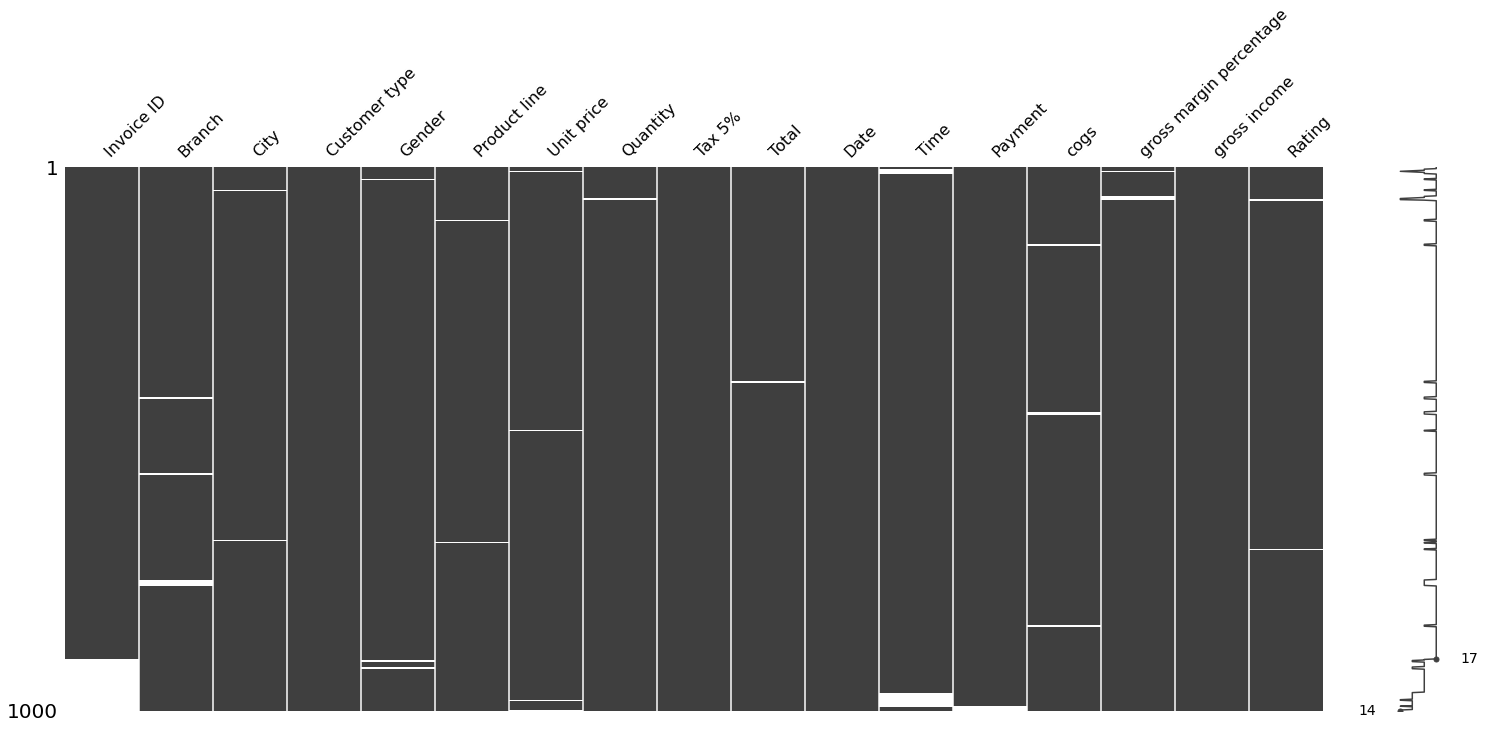

In [6]:
#checking where the data is missing through matrix 
msno.matrix(df)

## What have we found out about the data so far?

- The information regarding that data we have found out is that there are not as many missing values that we were expecting it to have which means that we do not have to drop any of the columns so far in order to continue working with the data. So far the most missing values are in the column INVOICE ID which is not a big problem, we can assign unique values to each one that is missing. For the rest, we will figure out something else

- We were also told in class that invoices can be replaced with serial number as they are not significant to the data analysis, therefore serialization replacement would also work just fine. So we could also do that

In [7]:
#making sure that all invoice ids are unique
df['Invoice ID'].nunique()

905

In [8]:
#it should be noted that this is a tedious process and there may be other ways such as adding a loop in order
#to ensure that all the numbers are replaced 
#however the loop in my case was giving errors and there werent as much to replace so I did it manually
# the code 400-10 denotes that the values are changed from nan to something else
df.at[905,'Invoice ID']= '400-10-202'
df.at[906,'Invoice ID']= '400-10-203'
df.at[907,'Invoice ID']= '400-10-204'
df.at[908,'Invoice ID']= '400-10-205'
df.at[909,'Invoice ID']= '400-10-206'
df.at[910,'Invoice ID']= '400-10-207'
df.at[911,'Invoice ID']= '400-10-208'
df.at[912,'Invoice ID']= '400-10-209'
df.at[905,'Invoice ID']= '400-10-210'
df.at[906,'Invoice ID']= '400-10-211'
df.at[907,'Invoice ID']= '400-10-212'
df.at[908,'Invoice ID']= '400-10-213'
df.at[909,'Invoice ID']= '400-10-214'
df.at[910,'Invoice ID']= '400-10-215'
df.at[911,'Invoice ID']= '400-10-216'
df.at[912,'Invoice ID']= '400-10-217'
df.at[905,'Invoice ID']= '400-10-218'
df.at[906,'Invoice ID']= '400-10-219'
df.at[907,'Invoice ID']= '400-10-220'
df.at[908,'Invoice ID']= '400-10-221'
df.at[909,'Invoice ID']= '400-10-222'
df.at[910,'Invoice ID']= '400-10-223'
df.at[911,'Invoice ID']= '400-10-224'
df.at[912,'Invoice ID']= '400-10-225'
df.at[913,'Invoice ID']= '400-10-226'
df.at[914,'Invoice ID']= '400-10-227'
df.at[915,'Invoice ID']= '400-10-228'
df.at[916,'Invoice ID']= '400-10-229'
df.at[917,'Invoice ID']= '400-10-230'
df.at[918,'Invoice ID']= '400-10-231'
df.at[919,'Invoice ID']= '400-10-232'
df.at[920,'Invoice ID']= '400-10-233'
df.at[921,'Invoice ID']= '400-10-234'
df.at[922,'Invoice ID']= '400-10-235'
df.at[923,'Invoice ID']= '400-10-236'
df.at[924,'Invoice ID']= '400-10-237'
df.at[925,'Invoice ID']= '400-10-238'
df.at[926,'Invoice ID']= '400-10-239'
df.at[927,'Invoice ID']= '400-10-240'
df.at[928,'Invoice ID']= '400-10-241'
df.at[929,'Invoice ID']= '400-10-242'
df.at[930,'Invoice ID']= '400-10-243'
df.at[931,'Invoice ID']= '400-10-244'
df.at[932,'Invoice ID']= '400-10-245'
df.at[933,'Invoice ID']= '400-10-246'
df.at[934,'Invoice ID']= '400-10-247'
df.at[935,'Invoice ID']= '400-10-248'
df.at[936,'Invoice ID']= '400-10-249'
df.at[937,'Invoice ID']= '400-10-250'
df.at[938,'Invoice ID']= '400-10-251'
df.at[939,'Invoice ID']= '400-10-252'
df.at[940,'Invoice ID']= '400-10-253'
df.at[941,'Invoice ID']= '400-10-254'
df.at[942,'Invoice ID']= '400-10-255'
df.at[943,'Invoice ID']= '400-10-256'
df.at[944,'Invoice ID']= '400-10-257'
df.at[945,'Invoice ID']= '400-10-258'
df.at[946,'Invoice ID']= '400-10-259'
df.at[947,'Invoice ID']= '400-10-260'
df.at[948,'Invoice ID']= '400-10-261'
df.at[949,'Invoice ID']= '400-10-262'
df.at[950,'Invoice ID']= '400-10-263'
df.at[951,'Invoice ID']= '400-10-264'
df.at[952,'Invoice ID']= '400-10-265'
df.at[953,'Invoice ID']= '400-10-266'
df.at[954,'Invoice ID']= '400-10-267'
df.at[955,'Invoice ID']= '400-10-268'
df.at[956,'Invoice ID']= '400-10-269'
df.at[957,'Invoice ID']= '400-10-270'
df.at[958,'Invoice ID']= '400-10-271'
df.at[959,'Invoice ID']= '400-10-272'
df.at[960,'Invoice ID']= '400-10-273'
df.at[961,'Invoice ID']= '400-10-274'
df.at[962,'Invoice ID']= '400-10-275'
df.at[963,'Invoice ID']= '400-10-276'
df.at[964,'Invoice ID']= '400-10-277'
df.at[965,'Invoice ID']= '400-10-278'
df.at[966,'Invoice ID']= '400-10-279'
df.at[967,'Invoice ID']= '400-10-280'
df.at[968,'Invoice ID']= '400-10-281'
df.at[969,'Invoice ID']= '400-10-282'
df.at[970,'Invoice ID']= '400-10-283'
df.at[971,'Invoice ID']= '400-10-284'
df.at[972,'Invoice ID']= '400-10-285'
df.at[973,'Invoice ID']= '400-10-286'
df.at[974,'Invoice ID']= '400-10-287'
df.at[975,'Invoice ID']= '400-10-288'
df.at[976,'Invoice ID']= '400-10-289'
df.at[977,'Invoice ID']= '400-10-290'
df.at[978,'Invoice ID']= '400-10-291'
df.at[979,'Invoice ID']= '400-10-292'
df.at[980,'Invoice ID']= '400-10-293'
df.at[981,'Invoice ID']= '400-10-294'
df.at[982,'Invoice ID']= '400-10-295'
df.at[983,'Invoice ID']= '400-10-296'
df.at[984,'Invoice ID']= '400-10-297'
df.at[985,'Invoice ID']= '400-10-298'
df.at[986,'Invoice ID']= '400-10-299'
df.at[987,'Invoice ID']= '400-10-300'
df.at[988,'Invoice ID']= '400-10-301'
df.at[989,'Invoice ID']= '400-10-302'
df.at[990,'Invoice ID']= '400-10-303'
df.at[991,'Invoice ID']= '400-10-304'
df.at[992,'Invoice ID']= '400-10-305'
df.at[993,'Invoice ID']= '400-10-306'
df.at[994,'Invoice ID']= '400-10-307'
df.at[995,'Invoice ID']= '400-10-308'
df.at[996,'Invoice ID']= '400-10-309'
df.at[997,'Invoice ID']= '400-10-310'
df.at[998,'Invoice ID']= '400-10-311'
df.at[999,'Invoice ID']= '400-10-312'

print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995   400-10-308      C  Naypyitaw        Normal    Male   
996   400-10-309      B   Mandalay        Normal  Female   
997   400-10-310      A     Yangon        Member    Male   
998   400-10-311      A     Yangon        Normal    Male   
999   400-10-312      A     Yangon        Member  Female   

               Product line  Unit price Quantity   Tax 5%     Total  \
0         Health and beauty       74.69        7  26.1415  548.9715   
1    Electronic accessories       15.28        5   3.8200     80.22   
2        Home and lifestyle       46.33        7  16.2155  340.525

In [9]:
#rechecking that all of them are unique and luckiliy they are!
df['Invoice ID'].nunique()

1000

## Working on Other Missing values

- Branch                     19
- City                        4
- Gender                      9
- Product line                5
- Unit price                  8
- Quantity                    4
- Total                       3
- Time                       35
- Payment                     9
- cogs                       11
- gross margin percentage     9
- Rating                      6

In [10]:
# for time we can just replace the nan value to 0 for now since it is not of the most importance
df['Time'] = df['Time'].replace(np.nan,0.0)
#print(df)

## Dealing with Variables like quantity, unit price and total

- When I was working with the quantity values, I kept getting python errors. Turns out that values in row 223, 244, 357 and 381 had random values like 'few' and '%'. Since these values are correlated I decided to fix the values before moving further

In [11]:
#fixing the values of quantity first
# quantity is basically tax - (total/unit price)

df.at[223,'Quantity'] = int(df.loc[223,'Tax 5%'] - (float(df.loc[223,'Total'])/df.loc[223,'Unit price']))
df.at[244,'Quantity'] = int(df.loc[244,'Tax 5%'] - (float(df.loc[244,'Total'])/df.loc[244,'Unit price']))
df.at[357,'Quantity'] = int(df.loc[357,'Tax 5%'] - (float(df.loc[357,'Total'])/df.loc[357,'Unit price']))
df.at[381,'Quantity'] = int(df.loc[381,'Tax 5%'] - (float(df.loc[381,'Total'])/df.loc[381,'Unit price']))


#checking for null values in the row of quantity
quantity_null = df[df['Quantity'].isnull()].index.tolist()
#print(quantity_null)

#replacing all null values for quantity
for index in quantity_null:
    df.loc[index,'Quantity'] = int(df.loc[index,'Tax 5%'] - (float(df.loc[index,'Total'])/df.loc[index,'Unit price']))

#print(df.Quantity)

In [12]:
#checking for null values in the row of Unit Price
Uprice_null = df[df['Unit price'].isnull()].index.tolist()
print(Uprice_null)

#replacing all null values for unit price
for index in Uprice_null:
    df.loc[index,'Unit price'] = abs((float(df.loc[index,'Total'])/float(df.loc[index,'Quantity'])) - float(df.loc[index,'Tax 5%']))
    
#df.isnull().sum()

[8, 9, 484, 485, 979, 980, 998, 999]


In [13]:
#checking for null values in the row of Total
Total_null = df[df['Total'].isnull()].index.tolist()
print(Total_null)

#removing values that are giving errors in calculation 
df.at[518,'Total'] =  abs(float(df.loc[518,'Tax 5%']) + float(df.loc[518,'Unit price'])*float(df.loc[518,'Quantity']))
df.at[433,'Total'] =  abs(float(df.loc[433,'Tax 5%']) + float(df.loc[433,'Unit price'])*float(df.loc[433,'Quantity']))
df.at[412,'Total'] =  abs(float(df.loc[412,'Tax 5%']) + float(df.loc[412,'Unit price'])*float(df.loc[412,'Quantity']))
df.at[391,'Total'] =  abs(float(df.loc[391,'Tax 5%']) + float(df.loc[391,'Unit price'])*float(df.loc[391,'Quantity']))
df.at[306,'Total'] =  abs(float(df.loc[306,'Tax 5%']) + float(df.loc[306,'Unit price'])*float(df.loc[306,'Quantity']))

#replacing all null values for total
for index in Total_null:
    df.loc[index,'Total'] = abs(float(df.loc[index,'Tax 5%']) + float(df.loc[index,'Unit price'])*float(df.loc[index,'Quantity']))

##df.isnull().sum()

[394, 395, 396]


## So what are the missing values left?

- Branch                     19
- City                        4
- Gender                      9
- Product line                5
- Payment                     9
- cogs                       11
- gross margin percentage     9
- Rating                      6


Now what we will do is try to fix the rest of the values. After checking if any other values are correlated to other columns in order to fix them

- For gross margin percentage I am noticing that all values in that column are same
- I am also noticing that there are places where gross % is written as 5 which I am assuming is a rounded off version of the number 4.761904762


In [14]:
#checking for null values in the row of gross margin %
grossmp_null = df[df['gross margin percentage'].isnull()].index.tolist()
print(grossmp_null)

[7, 8, 54, 55, 56, 57, 58, 59, 60]


In [15]:
#replacing all null values for total
for index in grossmp_null:
    df.loc[index,'gross margin percentage'] = "4.761904762"

#i noticed some places in the data said 'same' so fixing that error
df['gross margin percentage'] = df['gross margin percentage'].replace(['same'],'4.761904762')
#making the gross margin uniform
df['gross margin percentage'] = df['gross margin percentage'].replace(['5'],'4.761904762')
df['gross margin percentage'] = df['gross margin percentage'].replace(['1'],'4.761904762')

- Cogs = gross income - total
- therefore we fill those values

In [16]:
#checking for null values in the row of cogs
cogs_null = df[df['cogs'].isnull()].index.tolist()
print(cogs_null)

[142, 143, 144, 450, 451, 452, 453, 454, 842, 843, 844]


In [17]:
#replacing all null values for cogs
for index in cogs_null:
    df.loc[index,'cogs'] = abs(float(df.loc[index,'Total']) - float(df.loc[index,'gross income']))

# Dealing with qualitative missing values

- we have dealt with most of the missing values, it is easy to find correlation between values that are numeric and replace them, however, replacing qualitative missing values is a challenge and we need to apply other methods in order to deal with those

## Which missing values do we have to deal with now?

- Branch 19
- City 4
- Gender 9
- Product line 5
- Payment 9
- Rating 6

all of these are categorical data
I noticed one thing for branch and city they are correlated
- branch A is in Yangon
- branch B is in Mandalay
- branch C is in Naypyitaw

Using this information we will fill in the missing values

- Also I noticed that the values in the city have errors when it comes to the spelling of the name so we have to also fix that

In [18]:
#fixing names of city to make them uniform
#checking for unique values
df['City'].nunique()

8

- See we realise that even though there are only three cities, it is giving 7 unique values, therefore we need to fix those first

In [19]:
# checking which value values are unique
df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay', 'Yangono', 'Yangon0', nan,
       'Naypyitay', 'Naypyitawe', 'Naypyitawp'], dtype=object)

In [20]:
df['City'] = df['City'].replace(['Naypyitaw','Naypyitawe','Naypyitawp'],'Naypyitay')
df['City'] = df['City'].replace(['Yangono','Yangon0'],'Yangon')
df.City.unique()

array(['Yangon', 'Naypyitay', 'Mandalay', nan], dtype=object)

In [21]:
#checking for null values in city
city_null = df[df['City'].isnull()].index.tolist()
print(city_null)

[42, 43, 685, 686]


In [22]:
##replacing all null values for city
#this cannot be done like numerical values because we have to check which branch is present at 
#these indexes and replace accordingly

for index in city_null:
    if  df.loc[index,'Branch'] == 'A':
        df.loc[index,'City'] = 'Yangon'
    if  df.loc[index,'Branch'] == 'B':
        df.loc[index,'City'] = 'Mandalay'
    if  df.loc[index,'Branch'] == 'C':
        df.loc[index,'City'] = 'Naypyitay'
df.City.unique()

array(['Yangon', 'Naypyitay', 'Mandalay'], dtype=object)

- Now we do the same for replaceing Branch, the only difference here is that we interchange the values in if statement


In [23]:
#checking for null values in branch
branch_null = df[df['Branch'].isnull()].index.tolist()
print(branch_null)

[423, 424, 425, 426, 563, 564, 565, 566, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769]


In [24]:
for index in branch_null:
    if  df.loc[index,'City'] == 'Yangon':
        df.loc[index,'Branch'] = 'A'
    if  df.loc[index,'City'] == 'Mandalay':
        df.loc[index,'Branch'] = 'B'
    if  df.loc[index,'City'] == 'Naypyitay':
        df.loc[index,'Branch'] = 'C'

### So what else is left?


- Gender                     9
- Product line               5
- Payment                    9
- Rating                     6

for payment and gender we can use mode, now this may not give the most accurate result, but we can assume that the missing value is the value that is being used the most

In [25]:
#using simpleimputer for replacing the gender and payment using mode
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.Gender = imputer.fit_transform(df['Gender'].values.reshape(-1,1))[:,0]
df.Payment = imputer.fit_transform(df['Payment'].values.reshape(-1,1))[:,0]


In [26]:
#checking for null values in product line
prod_null = df[df['Product line'].isnull()].index.tolist()
print(prod_null)

#checking for null value in rating
rate_null = df[df['Rating'].isnull()].index.tolist()
print(rate_null)

[97, 98, 99, 690, 691]
[58, 59, 60, 61, 702, 703]


- for product line and rating we to search for different methods 
- for rating we can just set those to 0 assuming that the product has not recieved any rating


In [27]:
for index in rate_null:
    df.loc[index,'Rating'] = 0.0

- for product line there are only 5 rows we can just drop those since it will have no impact on the data and there is no way to find out the product line

In [28]:
df = df.dropna(subset=['Product line'])
#print(df)

- This section was added once I started working on the box plots for anomaly detection, gross income had entry errors like high and low instead of numeric values in 845, 701, 702, 703, 958. And since gross income is equal to tax we will fix that through it as well

In [29]:
#df['gross income'].unique()
# high, low 

df.at[845,'gross income'] = float(df.loc[845,'Tax 5%'])
df.at[702,'gross income'] = float(df.loc[702,'Tax 5%'])
df.at[703,'gross income'] = float(df.loc[703,'Tax 5%'])
df.at[704,'gross income'] = float(df.loc[704,'Tax 5%'])
df.at[958,'gross income'] = float(df.loc[958,'Tax 5%'])

In [30]:
df.isnull().sum()
#we can see there are no missing values left

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<AxesSubplot:>

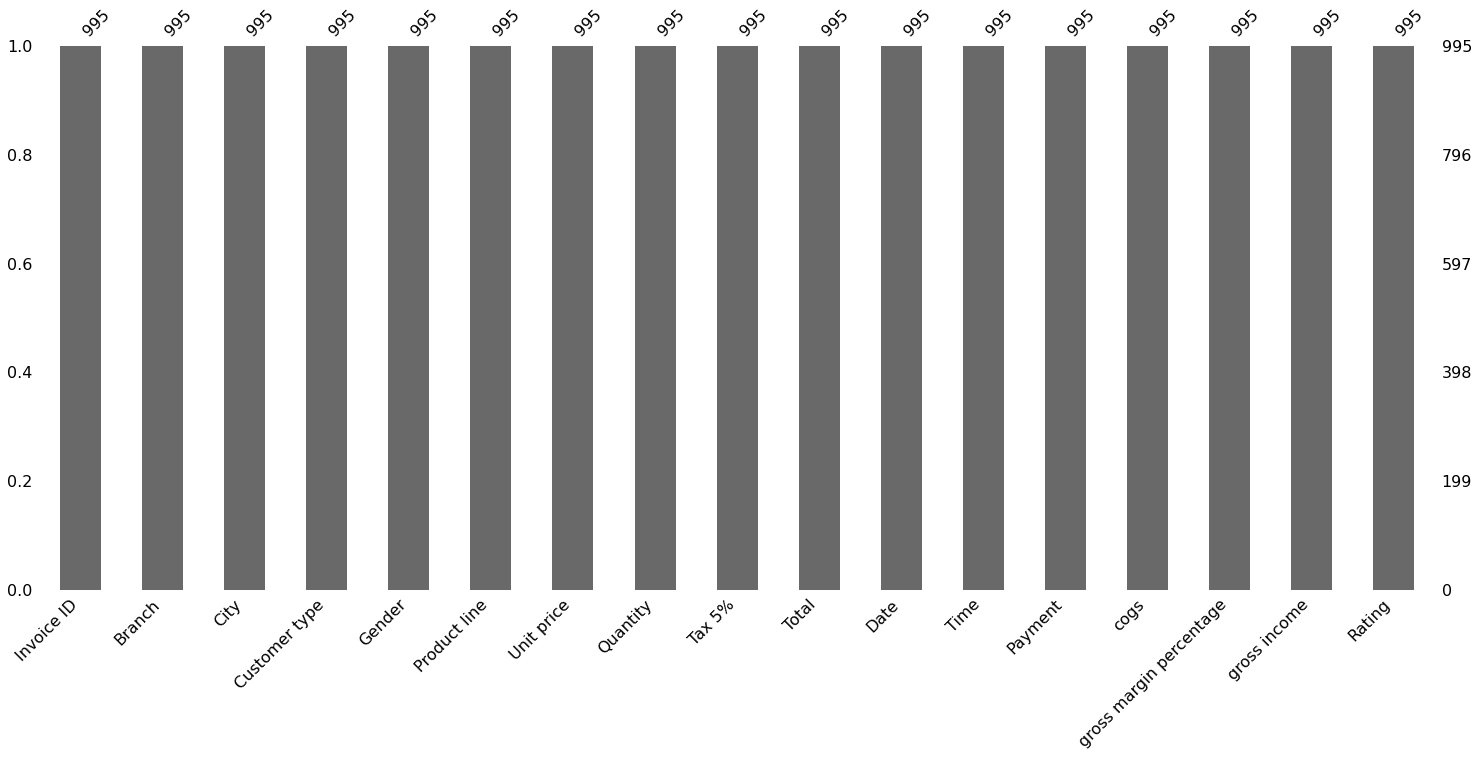

In [32]:
#visual rep of missing values
msno.bar(df)

#### Column renaming because product line and cogs sounds confusing

In [33]:
df.rename(columns={'Product line':'Product Type'},
                    inplace=True)
df.rename(columns={'cogs':'cost of goods sold'},
                    inplace=True)

- now we are done with the fixing of missing values now we check for anomalies

# Step 3: Anomaly Detection 

- this is an important part of our analysis this will give us an insight on how to data is working, what aspects should one look into, are the anomalies good or bad?
- It will also tell us if the missing values we added in the right way or not

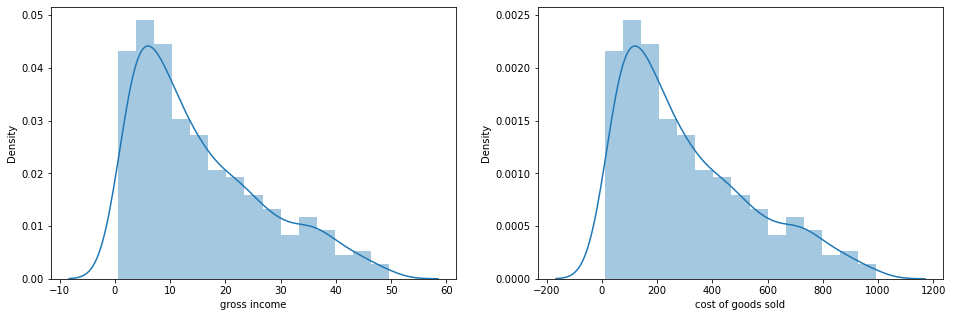

In [34]:
#looking at the disrubtion curve for gross income and cogs
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['gross income'])
plt.subplot(1,2,2)
sns.distplot(df['cost of goods sold'])
plt.show()


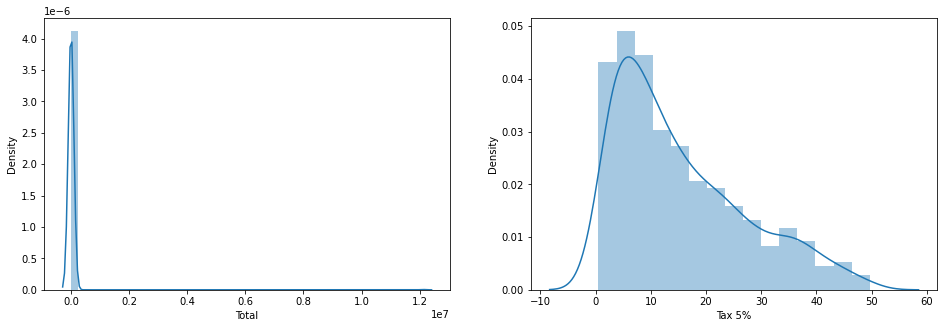

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Total'])
plt.subplot(1,2,2)
sns.distplot(df['Tax 5%'])
plt.show()

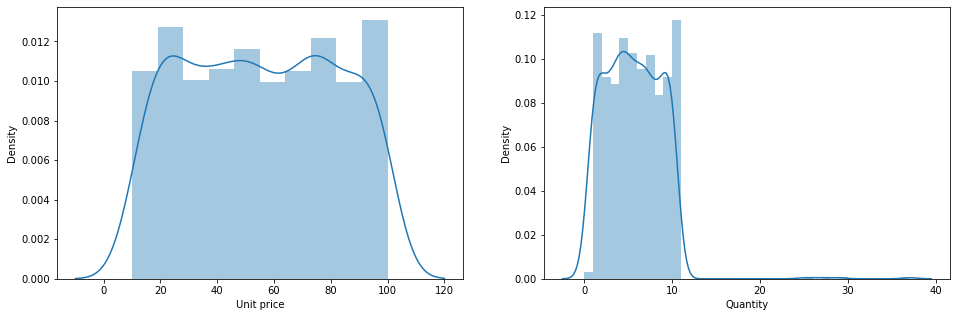

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Unit price'])
plt.subplot(1,2,2)
sns.distplot(df['Quantity'])
plt.show()

- It should be noted that except for unit price and quantity we notice that all of the other numeric data is skewed to the left, which means that the data is negatively skewed. Lets make box plots to have more insights as to why is this occuring


In [37]:
#Changing datatypes of columns
df['gross income'] = df['gross income'].astype(np.float32)
df['Total'] = df['Total'].astype(np.float32)

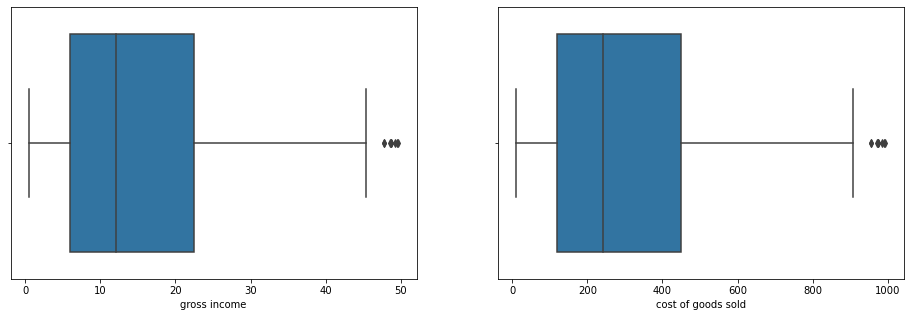

In [38]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['gross income'])
plt.subplot(1,2,2)
sns.boxplot(df['cost of goods sold'])
plt.show()

- it should be noted that outliers here are essential, as this data type is for sales, therefore, outliers mean that there were days when the sales were good therefore the gross income and cost of goods sold is higher, whereas on usually days, being skwed on the left means that they are not higher than the mean value. Therefore there is no reason to delete the outliers in our case as it would result in the inconsistency of data 

- However what we can do instead is print out the description of the outliers to have more insights on our data

In [39]:
df.loc[df['cost of goods sold'] > 900]

,Invoice ID,Branch,City,Customer type,Gender,Product Type,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost of goods sold,gross margin percentage,gross income,Rating
141,280-17-4359,C,Naypyitay,Member,Male,Health and beauty,90.50,10,45.250,950.250000,1/25/2019,13:48,Cash,905.0,4.761904762,45.250000,8.1
166,234-65-2137,C,Naypyitay,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590027,1/16/2019,13:32,Cash,955.8,4.761904762,47.790001,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290039,2/8/2019,16:20,Credit card,989.8,4.761904762,49.490002,8.7
350,860-79-0874,C,Naypyitay,Member,Female,Fashion accessories,99.30,10,49.650,1042.650024,2/15/2019,14:53,Credit card,993.0,4.761904762,49.650002,6.6
357,554-42-2417,C,Naypyitay,Normal,Female,Sports and travel,95.44,37,47.720,1002.119995,1/9/2019,13:45,Cash,954.4,4.761904762,47.720001,5.2
422,271-88-8734,C,Naypyitay,Member,Female,Fashion accessories,97.21,10,48.605,1020.705017,2/8/2019,13:00,Credit card,972.1,4.761904762,48.605000,8.7
429,325-77-6186,A,Yangon,Member,Female,Home and lifestyle,90.65,10,45.325,951.825012,3/8/2019,10:53,Ewallet,906.5,4.761904762,45.325001,7.3
557,283-26-5248,C,Naypyitay,Member,Female,Food and beverages,98.52,10,49.260,1034.459961,1/30/2019,20:23,Ewallet,985.2,4.761904762,49.259998,4.5
699,751-41-9720,C,Naypyitay,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750000,1/12/2019,16:18,Ewallet,975.0,4.761904762,48.750000,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385010,1/15/2019,13:48,Credit card,973.7,4.761904762,48.685001,4.9


Through this we get the following insights on the data:
- The highest cost of goods sold was mostly from branch C in Naypyitay
- Most of them were normal customers
- Many of them were female
- The highest cost of goods sold was 993.0 by a female member spending money on fashion accessories.

Similarly, we can make box plots for the rest of the numeric columns as well.

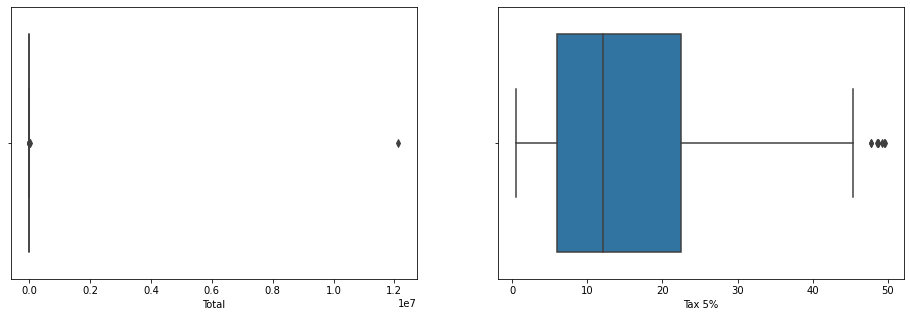

In [40]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['Total'])
plt.subplot(1,2,2)
sns.boxplot(df['Tax 5%'])
plt.show()

- There seems to be something wrong with the boxplot of Total which should be further investigated

In [41]:
df['Total'].describe()

count    9.950000e+02
mean     1.251726e+04
std      3.842679e+05
min      1.067850e+01
25%      1.252860e+02
50%      2.551500e+02
75%      4.733295e+02
max      1.212156e+07
Name: Total, dtype: float64

- we notice that due to the maximum being a very large number, the box plot was not being plotted the right way, however, since the outliers here are beneficial for sales, we will not remove it. We will just create a copy of the data and then remove the outlier to see insights of the rest of the data in the Total column. 

In [42]:
# copy the data
df_copy = df.copy()
#removing the outlier
df_copy = df[df['Total'] < 12000]  

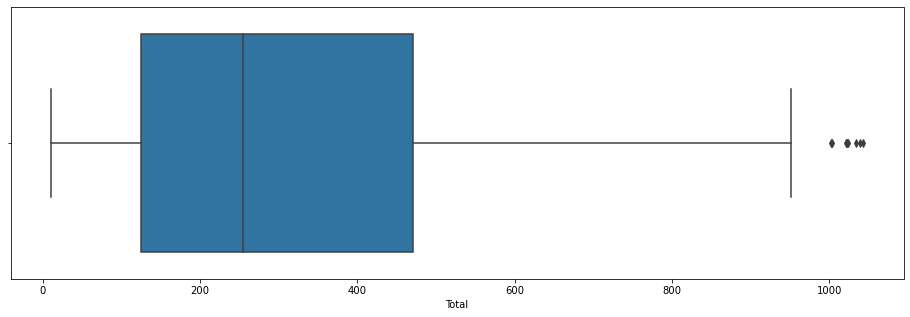

In [43]:
#replotting the 
plt.figure(figsize=(16,5))
#plt.subplot(1,2,1)
sns.boxplot(df_copy['Total'])
plt.show()

# Step 4: Descriptive Analysis

- In this section we will further check for insights of the data through numerous statistical methods that are available.
- First we will check the overall statstical descripion of our dataset

In [44]:
df.describe()
#there will be statistical data of only numerical values not categorical 

,Unit price,Tax 5%,Total,cost of goods sold,gross income,Rating
count,995.000000,995.000000,9.950000e+02,995.000000,995.000000,995.000000
mean,55.610249,15.368907,1.251726e+04,307.378131,15.368905,6.928744
std,26.510328,11.714296,3.842679e+05,234.285916,11.714295,1.793510
min,10.080000,0.508500,1.067850e+01,10.170000,0.508500,0.000000
25%,32.755000,5.894750,1.252860e+02,117.895000,5.894750,5.500000
50%,55.070000,12.080000,2.551500e+02,241.600000,12.080000,6.900000
75%,77.825000,22.429000,4.733295e+02,448.580000,22.429000,8.400000
max,99.960000,49.650000,1.212156e+07,993.000000,49.650002,10.000000


- though I have already figured out the correlated between the columns when I was fixing the missing values, however I will still create a heat map to ensure whether I have done it correctly or not 

<AxesSubplot:>

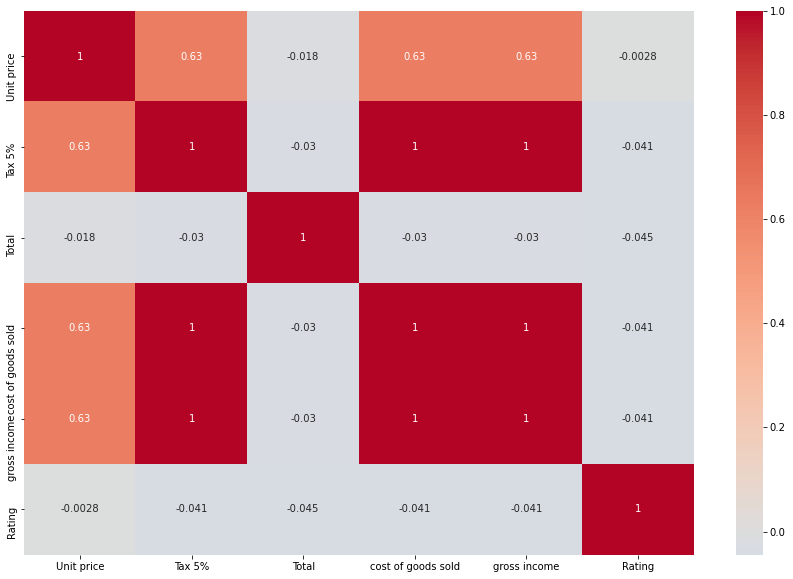

In [45]:
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center = 0)

- The thing about heatmaps is that the darker the color, the stronger the relationship there is between two columns

and according to my own observation, I was correct. 
    - Rating does not have a strong correlation with any other column
    - gross income has a strong correlation with cost of goods sold and tax
    - cost of goods sold has a strong relation with tax, gross income and a moderate relation with unit price
    - Total is showing a strong negative relation with all of them 
    - Tax has a strong correlation with gross income, cogs and unit price
    - and unit price has a mild relation with gross income, cogs and tax
   
## Insight that we have obtained is
 
  - The Stronger positive correlation, the directly propotional impact it has on the columns it is strongly correlated to
  - the stronger negative correlation, the inversely propotional impact it has on the columns it is strongly correlated to

- All these correlations have been shown above when I was fixing the missing data

## How will this heat map help us in exploring the data further?

- We will be able create numerous graphs to understand the data further.

<AxesSubplot:title={'center':'COGS/Date Co-relation'}, xlabel='Date', ylabel='cost of goods sold'>

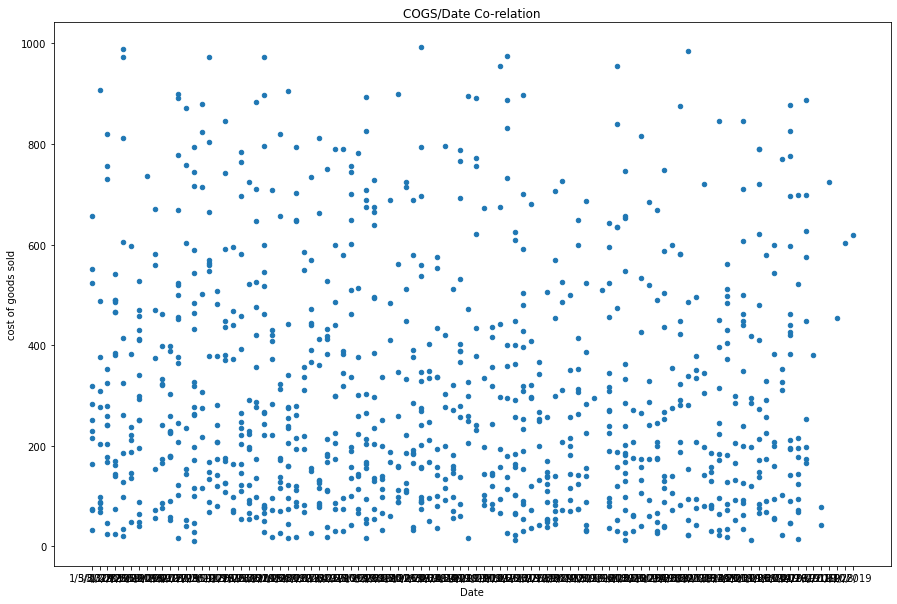

In [46]:
#checking for data quaterly
df_copy2 = df.copy()
#removing the outlier
df_copy2 = df[df['Date'] < '01-04-2019']  
df.plot.scatter(x='Date', y='cost of goods sold',  figsize=(15,10), sharex=False,
                     title='COGS/Date Co-relation')

- Using this scatter plot one can check the quaterly, annual and bi-annual analysis of the data as time series. There is a lot one can figure out using scatter plots. The above scatter plot looks a bit difficult to read on the x axis. But assuming the business requires us to look for the data analysis of bi-weekly data, the our scatter plot would look somewhat like the one below

<AxesSubplot:title={'center':'COGS/Date Co-relation Bi-weekly'}, xlabel='Date', ylabel='cost of goods sold'>

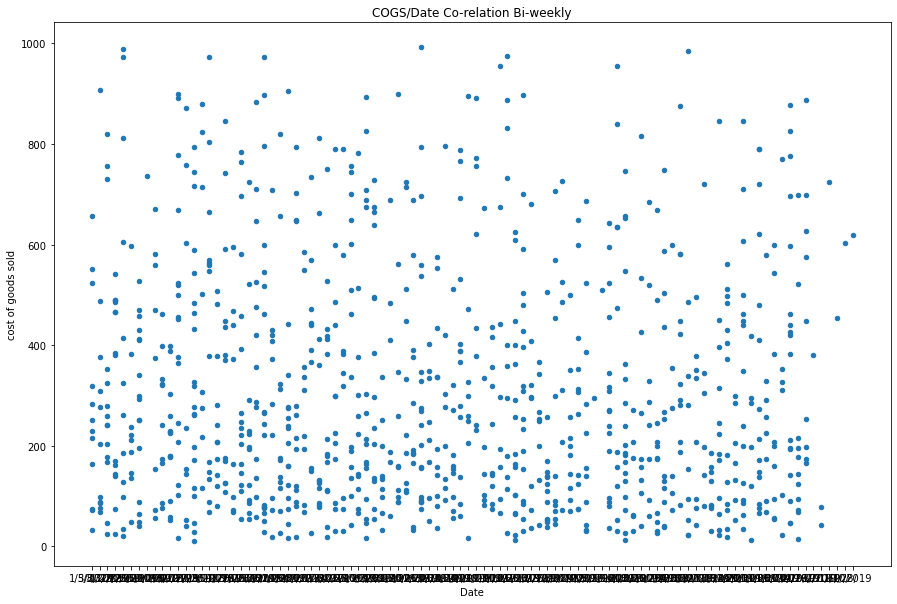

In [47]:
#checking for data bi-weekly data
#making copies so that it does not affect the rest of the data or the analysis 
df_copy3 = df.copy()
#removing the outlier
df_copy3 = df[(df['Date'] > '15-03-2019') & (df['Date'] <= '1-04-2019')]  
df.plot.scatter(x='Date', y='cost of goods sold',  figsize=(15,10), sharex=False,
                     title='COGS/Date Co-relation Bi-weekly')

- I missed some errors when I was fixing the missing values, One thing I understood about data cleaning is that we are always bound to come across multiple data entry errors as we continue with our analysis

In [48]:
#dropping rows with no dates given
df = df.drop([391, 413,916,999,703,956,989])
#resetting index
df = df.reset_index()

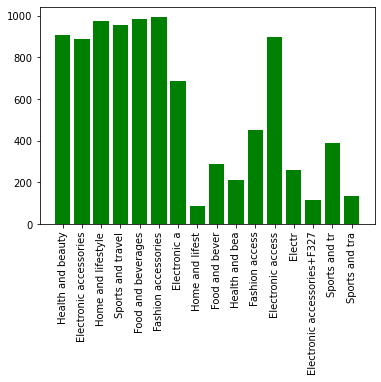

In [49]:
X = list(df.iloc[:, 6])
Y = list(df.iloc[:, 14])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.xticks(rotation=90)


  
# Show the plot
plt.show()

- Again we see that there is inconsistency in data entry therefore we have to fix that as well before analyzing the data

In [50]:
df['Product Type'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories', 'Electronic a', 'Home and lifest',
       'Food and bever', 'Health and bea', 'Fashion access',
       'Electronic access', 'Electr', 'Electronic accessories+F327',
       'Sports and tr', 'Sports and tra'], dtype=object)

In [51]:
df['Product Type'] = df['Product Type'].replace(['Electronic accessories','Electronic a','Electronic access','Electr','Electronic accessories+F327'],'Electronics')
df['Product Type'] = df['Product Type'].replace(['Food and bever'],'Food and beverages')
df['Product Type'] = df['Product Type'].replace(['Health and bea'],'Health and beauty')
df['Product Type'] = df['Product Type'].replace(['Home and lifest'],'Home and lifestyle')
df['Product Type'] = df['Product Type'].replace(['Sports and tr','Sports and tra'],'Sports and travel')
df['Product Type'] = df['Product Type'].replace(['Fashion access'],'Fashion accessories')
df['Product Type'].unique()

array(['Health and beauty', 'Electronics', 'Home and lifestyle',
       'Sports and travel', 'Food and beverages', 'Fashion accessories'],
      dtype=object)

- Since we have fixed that now let us check the bar graph once again

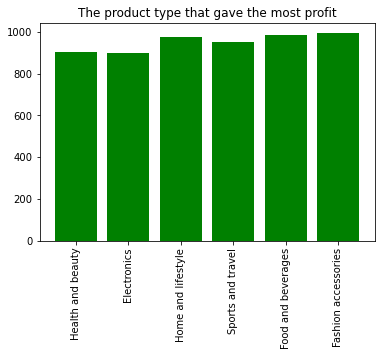

In [52]:
X = list(df.iloc[:, 6])
Y = list(df.iloc[:, 14])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.xticks(rotation=90)
plt.title("The product type that gave the most profit")

  
# Show the plot
plt.show()
# we can see that fashion accessories made the most profit

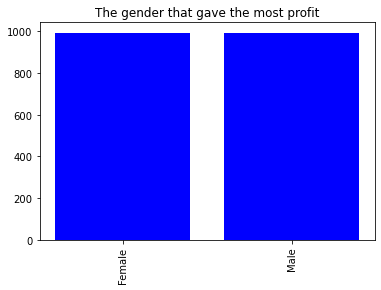

In [53]:
#gender that gave most profit
X = list(df.iloc[:, 5])
Y = list(df.iloc[:, 14])
  
# Plot the data using bar() method
plt.bar(X, Y, color='b')
plt.xticks(rotation=90)
plt.title("The gender that gave the most profit")

  
# Show the plot
plt.show()
# we can see that both gave equal amount of profit

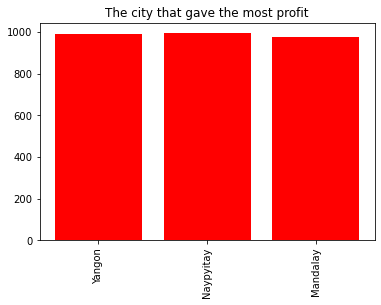

In [54]:
#city that gave most profit
X = list(df.iloc[:, 3])
Y = list(df.iloc[:, 14])
  
# Plot the data using bar() method
plt.bar(X, Y, color='r')
plt.xticks(rotation=90)
plt.title("The city that gave the most profit")

  
# Show the plot
plt.show()
# we can see the first two have comparative more profit than last one however there isnt much sigifiance 

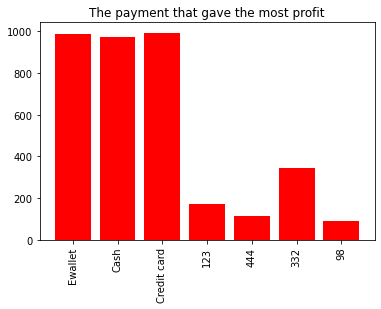

In [55]:
#payment type that was used 
X = list(df.iloc[:, 13])
Y = list(df.iloc[:, 14])
  
# Plot the data using bar() method
plt.bar(X, Y, color='r')
plt.xticks(rotation=90)
plt.title("The payment that gave the most profit")

  
# Show the plot
plt.show()


- We see that there is still errors with the payment type. Therefore data cleaning is still required. We will set these values to null 

In [56]:
df['Payment'] = df['Payment'].replace(['123','444','332','98'],'undefined')

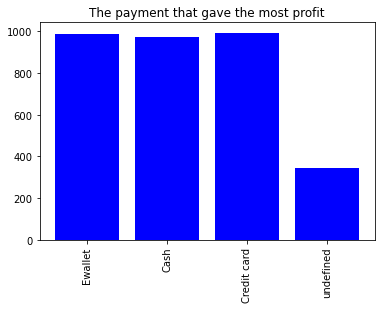

In [57]:
#remaking the graph
#payment type that was used 
X = list(df.iloc[:, 13])
Y = list(df.iloc[:, 14])
  
# Plot the data using bar() method
plt.bar(X, Y, color='b')
plt.xticks(rotation=90)
plt.title("The payment that gave the most profit")

  
# Show the plot
plt.show()

- Similarly we can check other attributes of the data and see how their correlation has an impact on the trends 

<AxesSubplot:title={'center':'scatterplot'}, xlabel='Customer type', ylabel='cost of goods sold'>

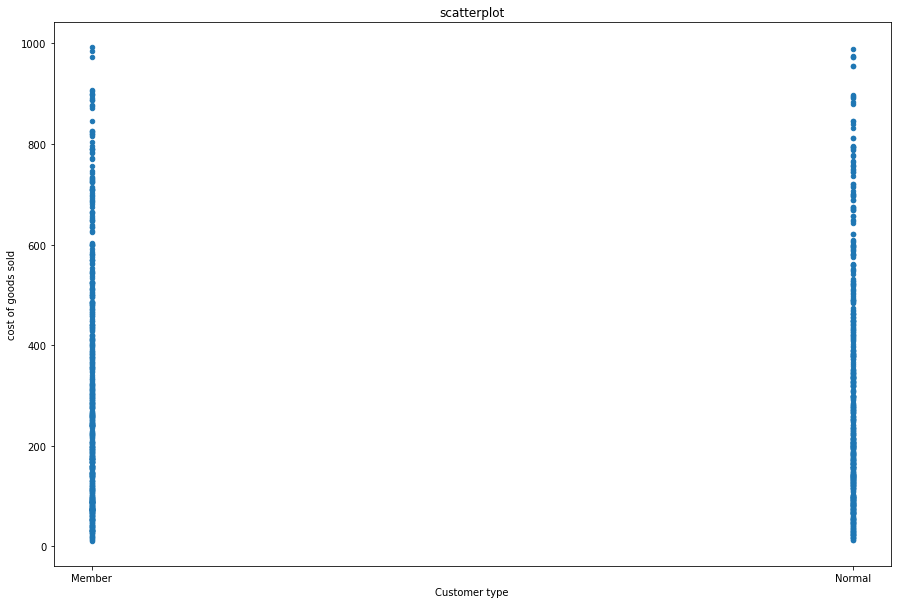

In [58]:
def cm_to_inch(value):
    return value/2.54
 
df.plot.scatter(x='Customer type', y='cost of goods sold',  figsize=(15,10), sharex=False,
                     title='scatterplot')

- Interestingly the scatter plot shows that members and normal customer type both give almost the same kind of benefit to the sales. there is very little difference beyond 600 in both

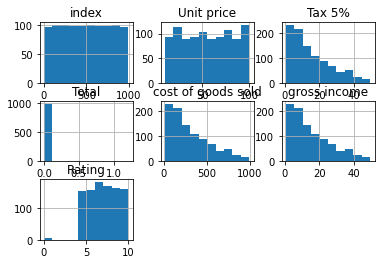

In [59]:
# create histogram for numeric data
df.drop(['index'], axis = 1)
df.hist()
  
# show plot
plt.show()

#we can gain insights from the histogram, ignoring the histogram of the index values since they are of no use
#we can see this histogram of total is impacted by the outlier 


In [60]:
df = df.set_index('Date')
df.head(3)

,index,Invoice ID,Branch,City,Customer type,Gender,Product Type,Unit price,Quantity,Tax 5%,Total,Time,Payment,cost of goods sold,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,
1/5/2019,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.971497,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
3/8/2019,1,226-31-3081,C,Naypyitay,Normal,Female,Electronics,15.28,5,3.8200,80.220001,10:29,Cash,76.40,4.761904762,3.8200,9.6
3/3/2019,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.525513,13:23,Credit card,324.31,4.761904762,16.2155,7.4


In [61]:
df.index

Index(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '1/22/1900', '1/10/2019', '2/20/2019',
       ...
       '3/29/2019', '3/22/2019', '1/24/2019', '3/10/2019', '2/22/2019',
       '2/18/2019', '1/29/2019', '3/2/2019', '2/9/2019', '2/22/2019'],
      dtype='object', name='Date', length=988)

In [62]:
# Using seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

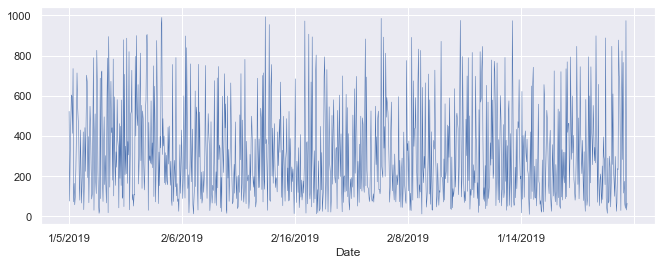

In [63]:
df['cost of goods sold'].plot(linewidth=0.5);
#the peaks tell us when was the max cogs was i.e on what days the maximum goods were sold 
# we could have used total here but the total has huge anomlaies which would disrupt the normal trend,
#cogs contributes to major part of the total therefore we can check the trend using that as well

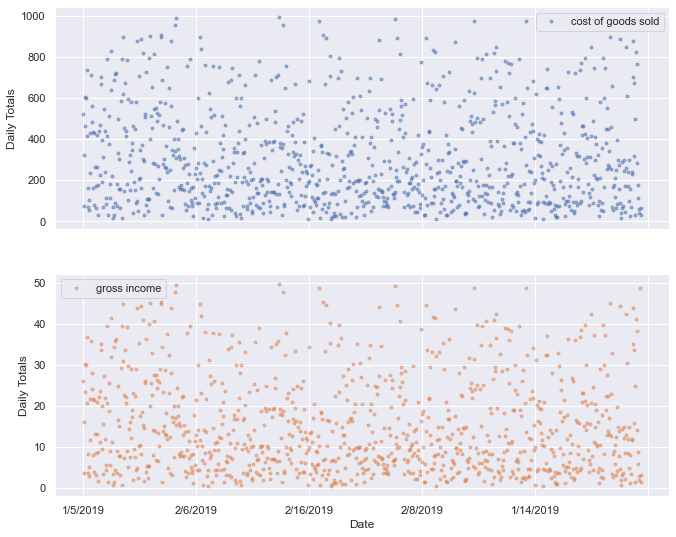

In [64]:
cols_plot = ['cost of goods sold', 'Quantity', 'gross income']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')
#here i was unable to figure out why quantity sold was not printing

- We can not see a massive pattern emerging here but we can see that most of the profits are under 400, there are few above 400 and the ones above 800 seem to be anomlous, which for a sales company is good, the company can gather more insights as to why those anomloes occured, in my understadning I think perhaps there were either giving discounts or maybe it was some day of singificance 

# Step 5: Inferential Analysis 

- Lastly we will perform some tests on our data, using the data analysis to infer properties of an underlying distribution of probability. 

1- T. test (is a statistical significance test that is used to compare the means of two groups and determine if the difference in means is statistically significant)

2- ANOVA Test (Analysis of variance is a collection of statistical models and their associated estimation procedures used to analyse the differences among means.)

3- Tukey Test (Tukey's range test, also known as Tukey's test, Tukey method, Tukey's honest significance test, or Tukey's HSD test, is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other.)

In [65]:
#Changing datatypes of columns
df['gross income'] = df['gross income'].astype(np.float64)
df['Total'] = df['Total'].astype(np.float64)
df['Unit price'] = df['Unit price'].astype(np.float64)
df['Quantity'] = df['Quantity'].astype(np.float64)
df['cost of goods sold'] = df['cost of goods sold'].astype(np.float64)
df['Tax 5%'] = df['Tax 5%'].astype(np.float64)
df['gross margin percentage'] = df['gross margin percentage'].astype(np.float64)
df['Rating'] = df['Rating'].astype(object)
df['index'] = df['index'].astype(object)

df.dtypes

index                       object
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product Type                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Time                        object
Payment                     object
cost of goods sold         float64
gross margin percentage    float64
gross income               float64
Rating                      object
dtype: object

In [66]:
#renaming cols again because it is giving errors
df.rename(columns={'Product Type':'Product_Type'},
                    inplace=True)
df.rename(columns={'cost of goods sold':'COGS'},
                    inplace=True)
df.rename(columns={'Product Type':'Product_Type'},
                    inplace=True)
df.rename(columns={'Customer type':'Customer_Type'},
                    inplace=True)
df.rename(columns={'Unit price':'Unit_price'},
                    inplace=True)
df.rename(columns={'Tax 5%':'Tax'},
                    inplace=True)
df.rename(columns={'gross margin percentage':'GMP'},
                    inplace=True)
df.rename(columns={'gross income':'gross_income'},
                    inplace=True)

- sorting out numeric and categorical data which might be helpful for us for the tests

In [67]:
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    #print(num_columns)
    return num_columns

numeric_columns = get_num_cols(df)
print(numeric_columns)

['Unit_price', 'Quantity', 'Tax', 'Total', 'COGS', 'GMP', 'gross_income']


In [68]:
numeric_columns.remove('Total')
numeric_columns.remove('GMP')


In [69]:
def get_cat_cols(df):
    types_map = df.dtypes.to_dict()
    cat_columns = []
    for k,v in types_map.items():
        if not( np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v)):
            cat_columns.append(k)

    #print(cat_columns)
    return cat_columns
categorical_columns = get_cat_cols(df)
print(categorical_columns)

['index', 'Invoice ID', 'Branch', 'City', 'Customer_Type', 'Gender', 'Product_Type', 'Time', 'Payment', 'Rating']


In [70]:
categorical_columns.remove('index')
categorical_columns.remove('Rating')
categorical_columns.remove('Invoice ID')

In [71]:
print(categorical_columns)

['Branch', 'City', 'Customer_Type', 'Gender', 'Product_Type', 'Time', 'Payment']


In [72]:
print(categorical_columns)
print(numeric_columns)

['Branch', 'City', 'Customer_Type', 'Gender', 'Product_Type', 'Time', 'Payment']
['Unit_price', 'Quantity', 'Tax', 'COGS', 'gross_income']


- These tests will help us figure out the correlation between categorical and numerical values. I have provided a desrciption of each of the test below which helps in the reading of the output of each test

# T-Test

- A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups. In our case, between 2 Numerical columns, to determine whether two variables are dependent on eachother or not.

- t-test establishes the problem statement by assuming a null hypothesis that the two means are equal Values are calculated and compared against the standard values, and the assumed null hypothesis is accepted or rejected accordingly.

-  The t-value is a ratio of the difference between the mean of the two sample sets and the variation that exists within the sample sets whereas the A p-value is the probability that the results from sample data occurred by chance. 
- Low p-values are good; They indicate your data did not occur by chance.

In [73]:
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    print(num_columns)
    return num_columns

def t_test(df):
    num_columns = get_num_cols(df)
    for i in range(len(num_columns)-1):
        print("\n ......."+num_columns[i]+".......")
        for j in range(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(df[col1], df[col2])
            print("(%s,%s) => t-value = %s, p-value = %s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
            # interpret p-value
            alpha = 0.05
            if p_val <= alpha:
                print('Dependent')
            else:
                print('Independent')

In [74]:
t_test(df)

['Unit_price', 'Quantity', 'Tax', 'Total', 'COGS', 'GMP', 'gross_income']

 .......Unit_price.......
(Unit_price,Quantity) => t-value = 58.785986767259146, p-value = 0.0
Dependent
(Unit_price,Tax) => t-value = 43.641816822143895, p-value = 7.815068479168561e-292
Dependent
(Unit_price,Total) => t-value = -1.022723298507642, p-value = 0.30656400790043636
Independent
(Unit_price,COGS) => t-value = -33.4978613294974, p-value = 3.5199609186548944e-195
Dependent
(Unit_price,GMP) => t-value = 60.19892084051108, p-value = 0.0
Dependent
(Unit_price,gross_income) => t-value = 43.64181682550487, p-value = 7.815067895454127e-292
Dependent

 .......Quantity.......
(Quantity,Tax) => t-value = -25.22763624483072, p-value = 5.919107944925003e-122
Dependent
(Quantity,Total) => t-value = -1.0268031999234226, p-value = 0.30463894489653637
Independent
(Quantity,COGS) => t-value = -40.43191172950761, p-value = 6.662323306081063e-261
Dependent
(Quantity,GMP) => t-value = 7.676110890955657, p-value = 2.56095

- Here I will explain one of the readings provided by the T-test
Lets take Unit price for instance
  - The unit price is dependent/correlated to quantity because the p value is 0, therefore our data did not occur by chance
However,
- A large t-score indicates that the groups are different.
- A small t-score indicates that the groups are similar.

the t-score between unit price and quantity is seems quite high but it is a relatively smaller value therefore they both are similar groups and therefore dependent

# Chi-Square Test

- The Chi-square test of independence is a statistical hypothesis test used to determine whether two categorical or nominal variables are likely to be related or not.
- A low value for chi-square means there is a high correlation between your two sets of data. In theory, if your observed and expected values were equal (“no difference”) then chi-square would be zero — an event that is unlikely to happen in real life. 

- most of our categorical variables are not correlated therefore most our data is shown to be indepedent 
however, there are times when some data has casual relationship with other columns, that is something chi-sq test fails to recognize and of course, will not be able to detect 

 - The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

In [75]:
def chi_square_test(cat_cols, df):
    for i in range(len(cat_cols)-1):
        print("\n\t --------"+cat_cols[i]+"--------")
        for j in range(i+1,len(cat_cols)):
            cat_var1 = cat_cols[i]
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

    # interpret p-value
            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent, hypothesis is rejected') #there exists a relation between them
            else:
                print('Independent, null hypothesis is not rejected') #there exists no relation between them
            print("\n")

In [76]:
chi_square_test(categorical_columns, df)


	 --------Branch--------
City    Mandalay  Naypyitay  Yangon
Branch                             
A              0          0     337
B            328          0       0
C              0        323       0
dof=4
[[111.87854251 110.17307692 114.94838057]
 [108.89068826 107.23076923 111.87854251]
 [107.23076923 105.59615385 110.17307692]]
significance=0.050, p=0.000
Dependent, hypothesis is rejected


Customer_Type  Member  Normal
Branch                       
A                 166     171
B                 163     165
C                 165     158
dof=2
[[168.5 168.5]
 [164.  164. ]
 [161.5 161.5]]
significance=0.050, p=0.888
Independent, null hypothesis is not rejected


Gender  Female  Male
Branch              
A          159   178
B          157   171
C          174   149
dof=2
[[167.13562753 169.86437247]
 [162.67206478 165.32793522]
 [160.19230769 162.80769231]]
significance=0.050, p=0.170
Independent, null hypothesis is not rejected


Product_Type  Electronics  Fashion accessories

# ANOVA TEST

- An ANOVA test is a way to find out if survey or experiment results are significant. In other words, they help to figure out if we need to reject the null hypothesis or accept the alternate hypothesis.
- The F-value in an ANOVA is calculated as: variation between sample means / variation within the samples. 

     - The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples.
     - The higher the F-value, the lower the corresponding p-value
     - If the p-value is below a certain threshold we can reject the null hypothesis of the ANOVA and conclude that there is a statistically significant difference between group means.
      - an F statistic greater than the computed F statistic when the null hypothesis is true. The smaller the p-value, the stronger the evidence against the null hypothesis.

In [77]:
def anova_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):   
        num_col = num_cols[i]
        for j in range(len(cat_cols)-1):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=df).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)
            print()

In [78]:
anova_test(numeric_columns, categorical_columns, df)


ANOVA => Unit_price - Branch
                 sum_sq     df         F    PR(>F)
Branch       623.998211    2.0  0.441854  0.642971
Residual  695522.038217  985.0       NaN       NaN


ANOVA => Unit_price - City
                 sum_sq     df         F    PR(>F)
City         623.998211    2.0  0.441854  0.642971
Residual  695522.038217  985.0       NaN       NaN


ANOVA => Unit_price - Customer_Type
                      sum_sq     df         F    PR(>F)
Customer_Type     128.210454    1.0  0.181627  0.670072
Residual       696017.825975  986.0       NaN       NaN


ANOVA => Unit_price - Gender
                 sum_sq     df         F    PR(>F)
Gender        50.631926    1.0  0.071719  0.788907
Residual  696095.404503  986.0       NaN       NaN


ANOVA => Unit_price - Product_Type
                     sum_sq     df         F    PR(>F)
Product_Type    1505.760895    5.0  0.425733  0.830936
Residual      694640.275533  982.0       NaN       NaN


ANOVA => Unit_price - Time
              

## References: 

- https://v8doc.sas.com/sashtml/insight/chap14/sect4.htm#:~:text=You%20can%20use%20the%20p,the%20null%20hypothesis%20is%20true. 
- https://www.statology.org/what-does-a-high-f-value-mean/#:~:text=The%20F%2Dvalue%20in%20an%20ANOVA%20is%20calculated%20as%3A%20variation,lower%20the%20corresponding%20p%2Dvalue.
- https://www.statisticshowto.com/probability-and-statistics/chi-square/
= https://www.statisticshowto.com/tukey-test-honest-significant-difference/
- https://www.investopedia.com/terms/t/t-test.asp#:~:text=Higher%20values%20of%20the%20t,that%20the%20groups%20are%20similar.
- GeeksforGeeks and Tutorialspoint